# Install and import required libraries

In [2]:
# install huggingface and datasets
!pip install -q datasets transformers
!pip install torch
!pip install pandas
!pip install pyarrow
!pip install --upgrade scikit-learn

In [3]:
import datasets
from datasets import load_dataset, ClassLabel
import pandas as pd
import numpy as np
import torch
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Load dataset

In [4]:
test_path = '/Users/ameliachen/Downloads/error_analysis/data/aa_uzh/aauzh_bundle4_newseye_fr_1.tsv'
gold_path = '/Users/ameliachen/Downloads/error_analysis/data/HIPE-2022-v2.1-newseye-test-fr.tsv'

In [5]:
def load_dataset(path):
    df = pd.read_csv(path, sep='\t', skip_blank_lines=False, engine='python', quoting=3, error_bad_lines=False)
    return df

tsv_test = load_dataset(test_path)
tsv_gold = load_dataset(gold_path)

Skipping line 58556: Expected 10 fields in line 58556, saw 15


# Preprocess

In [6]:
def simple_preprocess(dataframe):
    # Add end_of_document token in df
    dataframe = dataframe.dropna(subset=['TOKEN'])

    # Filter out metadata rows beginning with #
    dataframe = dataframe[~dataframe['TOKEN'].astype(str).str.startswith('#')]
    dataframe = dataframe[~dataframe['TOKEN'].astype(str).str.startswith('\t')]

    #transforming nan var from Float to string to use in (***)
    dataframe.MISC = dataframe.MISC.fillna('')

    return dataframe

In [7]:
tsv_gold = simple_preprocess(tsv_gold)
tsv_gold.head()

,TOKEN,NE-COARSE-LIT,NE-COARSE-METO,NE-FINE-LIT,NE-FINE-METO,NE-FINE-COMP,NE-NESTED,NEL-LIT,NEL-METO,MISC
0,Celui,O,_,O,_,_,O,_,_,NoSpaceAfter
1,-,O,_,O,_,_,O,_,_,NoSpaceAfter
2,ci,O,_,O,_,_,O,_,_,_
3,me,O,_,O,_,_,O,_,_,_
4,verse,O,_,O,_,_,O,_,_,_


# Data Cleaning

In [8]:
# loading pred data and custom column name into dataframe
df_test = pd.DataFrame(data=tsv_test, columns=tsv_test.columns)
df_test = df_test[["TOKEN", "NE-COARSE-LIT"]]
df_test.columns = ["TOKEN", "Pred_NE-COARSE-LIT"]

# loading gold data and custom column name into dataframe
df_gold = pd.DataFrame(data=tsv_gold, columns=tsv_gold.columns)
df_gold = df_gold[["TOKEN", "NE-COARSE-LIT"]]
df_gold.columns = ["TOKEN", "True_NE-COARSE-LIT"]

In [14]:
# merge the "NE-COARSE-LIT" colum from true and pred
df_all = pd.merge(df_gold, df_test, left_index=True, right_index=True, on="TOKEN")
pd.set_option('display.max_rows', df_all.shape[0]+1)
df_all.head(865)

,TOKEN,True_NE-COARSE-LIT,Pred_NE-COARSE-LIT
0,Celui,O,O
1,-,O,O
2,ci,O,O
3,me,O,O
4,verse,O,O
5,un,O,O
6,petit,O,O
7,vin,O,O
8,rouge,O,O
9,con¬,O,O


In [15]:
# exclude non-labelled tokens
df_all.drop(df_all.index[df_all['True_NE-COARSE-LIT'] == '_'], inplace = True)
df_all.head(100)

,TOKEN,True_NE-COARSE-LIT,Pred_NE-COARSE-LIT
0,Celui,O,O
1,-,O,O
2,ci,O,O
3,me,O,O
4,verse,O,O
5,un,O,O
6,petit,O,O
7,vin,O,O
8,rouge,O,O
9,con¬,O,O


# Error Analysis Visualization

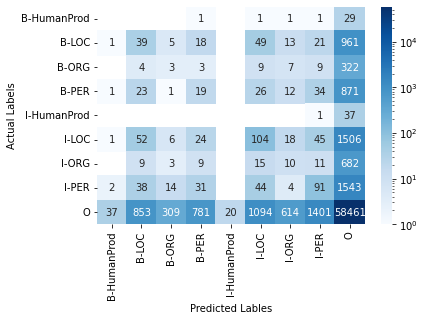

In [16]:
confusion_matrix = pd.crosstab(df_all['True_NE-COARSE-LIT'], df_all['Pred_NE-COARSE-LIT'],  rownames=['Actual Labels'], colnames=['Predicted Lables'])
sn.heatmap(confusion_matrix, annot=True, fmt="", cmap="Blues", norm=LogNorm(vmin=1, clip=True))
plt.show()